## サンプルデータ準備

In [7]:
from glob import glob
from datetime import date, datetime, timezone, timedelta
import pandas as pd
import numpy as np
from fastprogress import progress_bar as pb
import matplotlib.pyplot as plt
import statsmodels.tsa.api as tsa

In [8]:
!cp /content/drive/MyDrive/data/crypto/historical_resampled/gmo/gmo_15min.zip .

In [9]:
!unzip gmo_15min.zip > /dev/null

In [10]:
btcjpy_files = glob('/content/15min/BTC_JPY/**/*.csv.gzip', recursive=True)

In [11]:
len(btcjpy_files)

59

In [12]:
df_btcjpy = pd.concat([pd.read_csv(f, compression='gzip') for f in pb(btcjpy_files)])

In [13]:
df_btcjpy['timestamp'] = pd.to_datetime(df_btcjpy['timestamp'], utc=True)

In [14]:
df_btcjpy_buy = df_btcjpy[df_btcjpy['side']=='BUY']
df_btcjpy_sell = df_btcjpy[df_btcjpy['side']=='SELL']
print(len(df_btcjpy_buy), len(df_btcjpy_sell))

df_btcjpy_buy.drop_duplicates('timestamp', inplace=True)
df_btcjpy_sell.drop_duplicates('timestamp', inplace=True)
print(len(df_btcjpy_buy), len(df_btcjpy_sell))

df_btcjpy_buy = df_btcjpy_buy.set_index('timestamp')
df_btcjpy_sell = df_btcjpy_sell.set_index('timestamp')

df_btcjpy_buy = df_btcjpy_buy.sort_index().resample('15T', label='right', closed='right').ffill().fillna(method='ffill')
df_btcjpy_sell = df_btcjpy_sell.sort_index().resample('15T', label='right', closed='right').ffill().fillna(method='ffill')
print(len(df_btcjpy_buy), len(df_btcjpy_sell))

170399 170400
170399 170400


<ipython-input-14-0c04ecfc9ce0>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_btcjpy_buy.drop_duplicates('timestamp', inplace=True)
<ipython-input-14-0c04ecfc9ce0>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_btcjpy_sell.drop_duplicates('timestamp', inplace=True)


170400 170400


In [15]:
df_btcjpy_buy

,size_mean,size_std,size_count,size_sum,size_ohlc_open,size_ohlc_high,size_ohlc_low,size_ohlc_close,price_mean,price_std,price_count,price_sum,price_ohlc_open,price_ohlc_high,price_ohlc_low,price_ohlc_close,side
timestamp,,,,,,,,,,,,,,,,,
2018-12-31 21:15:00+00:00,0.268333,0.259294,12,3.22,0.11,0.92,0.01,0.29,4.049046e+05,480.266301,12,4.858855e+06,404393.0,405571.0,404393.0,405571.0,BUY
2018-12-31 21:30:00+00:00,0.130000,0.259294,1,0.13,0.13,0.13,0.13,0.13,4.053070e+05,480.266301,1,4.053070e+05,405307.0,405307.0,405307.0,405307.0,BUY
2018-12-31 21:45:00+00:00,0.130000,0.259294,0,0.00,0.13,0.13,0.13,0.13,4.053070e+05,480.266301,0,0.000000e+00,405307.0,405307.0,405307.0,405307.0,BUY
2018-12-31 22:00:00+00:00,0.257037,0.265733,27,6.94,0.03,1.02,0.01,0.57,4.037711e+05,160.508017,27,1.090182e+07,404318.0,404318.0,403421.0,403841.0,BUY
2018-12-31 22:15:00+00:00,0.335833,0.501406,12,4.03,0.82,1.63,0.01,0.05,4.047461e+05,653.636465,12,4.856953e+06,403865.0,405516.0,403865.0,404003.0,BUY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-10 20:00:00+00:00,0.012778,0.011113,36,0.46,0.01,0.07,0.01,0.01,5.648172e+06,4519.415174,36,2.033342e+08,5648751.0,5655551.0,5641156.0,5642091.0,BUY
2023-11-10 20:15:00+00:00,0.019036,0.024410,249,4.74,0.01,0.29,0.01,0.01,5.638182e+06,3578.195859,249,1.403907e+09,5643177.0,5643583.0,5628227.0,5632297.0,BUY
2023-11-10 20:30:00+00:00,0.012456,0.007387,57,0.71,0.01,0.05,0.01,0.01,5.627515e+06,3014.560905,57,3.207684e+08,5630706.0,5632936.0,5620596.0,5629578.0,BUY


In [16]:
df_btcjpy_buy['size_ohlc_open_rel'] = (df_btcjpy_buy['size_ohlc_open'] - df_btcjpy_buy['size_mean']) / df_btcjpy_buy['size_mean']
df_btcjpy_buy['size_ohlc_high_rel'] = (df_btcjpy_buy['size_ohlc_high'] - df_btcjpy_buy['size_mean']) / df_btcjpy_buy['size_mean']
df_btcjpy_buy['size_ohlc_low_rel'] = (df_btcjpy_buy['size_ohlc_low'] - df_btcjpy_buy['size_mean']) / df_btcjpy_buy['size_mean']
df_btcjpy_buy['size_ohlc_close_rel'] = (df_btcjpy_buy['size_ohlc_close'] - df_btcjpy_buy['size_mean']) / df_btcjpy_buy['size_mean']

In [17]:
df_btcjpy_sell['size_ohlc_open_rel'] = (df_btcjpy_sell['size_ohlc_open'] - df_btcjpy_sell['size_mean']) / df_btcjpy_sell['size_mean']
df_btcjpy_sell['size_ohlc_high_rel'] = (df_btcjpy_sell['size_ohlc_high'] - df_btcjpy_sell['size_mean']) / df_btcjpy_sell['size_mean']
df_btcjpy_sell['size_ohlc_low_rel'] = (df_btcjpy_sell['size_ohlc_low'] - df_btcjpy_sell['size_mean']) / df_btcjpy_sell['size_mean']
df_btcjpy_sell['size_ohlc_close_rel'] = (df_btcjpy_sell['size_ohlc_close'] - df_btcjpy_sell['size_mean']) / df_btcjpy_sell['size_mean']

In [18]:
df_btcjpy_buy['price_ohlc_open_rel'] = (df_btcjpy_buy['price_ohlc_open'] - df_btcjpy_buy['price_mean']) / df_btcjpy_buy['price_mean']
df_btcjpy_buy['price_ohlc_high_rel'] = (df_btcjpy_buy['price_ohlc_high'] - df_btcjpy_buy['price_mean']) / df_btcjpy_buy['price_mean']
df_btcjpy_buy['price_ohlc_low_rel'] = (df_btcjpy_buy['price_ohlc_low'] - df_btcjpy_buy['price_mean']) / df_btcjpy_buy['price_mean']
df_btcjpy_buy['price_ohlc_close_rel'] = (df_btcjpy_buy['price_ohlc_close'] - df_btcjpy_buy['price_mean']) / df_btcjpy_buy['price_mean']

In [19]:
df_btcjpy_sell['price_ohlc_open_rel'] = (df_btcjpy_sell['price_ohlc_open'] - df_btcjpy_sell['price_mean']) / df_btcjpy_sell['price_mean']
df_btcjpy_sell['price_ohlc_high_rel'] = (df_btcjpy_sell['price_ohlc_high'] - df_btcjpy_sell['price_mean']) / df_btcjpy_sell['price_mean']
df_btcjpy_sell['price_ohlc_low_rel'] = (df_btcjpy_sell['price_ohlc_low'] - df_btcjpy_sell['price_mean']) / df_btcjpy_sell['price_mean']
df_btcjpy_sell['price_ohlc_close_rel'] = (df_btcjpy_sell['price_ohlc_close'] - df_btcjpy_sell['price_mean']) / df_btcjpy_sell['price_mean']

In [20]:
def min2lag(min: int) -> int:
    assert min % 15 == 0, 'min must be multiple of 15'
    return min // 15

return(t; lag) = sell_price_open(t+lag+1) / buy_price_open(t+1) - 1  
t時点の(までの情報を用いた)予測対象リターンはt+1時点のオープンからt+1+lag時点のopenへの変化  
　->t時点の情報を見てt+1開始時にオーダーを入れる想定のため

In [21]:
RETURN_MINS = [15, 30, 45, 60, 60*6, 60*24, 60*24*7, 60*24*30]

In [22]:
df_target = pd.DataFrame(index=df_btcjpy_sell.index)
df_target.index.name = 'timestamp'

In [23]:
for m in RETURN_MINS:
    lag = min2lag(m)
    df_target[f'return_{m}min'] = df_btcjpy_sell['price_ohlc_open'].shift(-(lag+1)) / df_btcjpy_buy['price_ohlc_open'].shift(-1) - 1


In [24]:
TARGET_COLS = df_target.columns.tolist()

In [25]:
TARGET_COLS

['return_15min',
 'return_30min',
 'return_45min',
 'return_60min',
 'return_360min',
 'return_1440min',
 'return_10080min',
 'return_43200min']

In [26]:
START_DT = datetime(2022, 1, 1, tzinfo=timezone.utc)

In [27]:
PERIODS = [
    {
        'train_start_dt': datetime(2023, 7, 1, tzinfo=timezone.utc),
        'train_end_dt': datetime(2023, 10, 1, tzinfo=timezone.utc) - timedelta(minutes=1),
        'test_start_dt': datetime(2023, 10, 1, tzinfo=timezone.utc),
        'test_end_dt': datetime(2023, 11, 1, tzinfo=timezone.utc) - timedelta(minutes=1),
    }
]

In [28]:
PERIODS

[{'train_start_dt': datetime.datetime(2023, 7, 1, 0, 0, tzinfo=datetime.timezone.utc),
  'train_end_dt': datetime.datetime(2023, 9, 30, 23, 59, tzinfo=datetime.timezone.utc),
  'test_start_dt': datetime.datetime(2023, 10, 1, 0, 0, tzinfo=datetime.timezone.utc),
  'test_end_dt': datetime.datetime(2023, 10, 31, 23, 59, tzinfo=datetime.timezone.utc)}]

In [29]:
len(df_target.loc[PERIODS[0]['train_start_dt']:PERIODS[0]['train_end_dt']])

8832

In [30]:
FREQ_MIN = 15

In [31]:
FEAT_RETURN_MINS = [FREQ_MIN, FREQ_MIN*2, FREQ_MIN*3, FREQ_MIN*4, FREQ_MIN*12, FREQ_MIN*12*4]

In [32]:
for m in FEAT_RETURN_MINS:
    lag = min2lag(m)
    df_btcjpy_sell[f'return_backward_min{m}'] = df_btcjpy_sell['price_ohlc_open'] / df_btcjpy_sell['price_ohlc_open'].shift(lag) - 1
    df_btcjpy_buy[f'return_backward_min{m}'] = df_btcjpy_buy['price_ohlc_open'] / df_btcjpy_buy['price_ohlc_open'].shift(lag) - 1

In [33]:
assert (df_btcjpy_sell.add_prefix('sell_').index == df_btcjpy_buy.add_prefix('buy_').index).all()
df_feat = pd.concat([df_btcjpy_sell.add_prefix('sell_'), df_btcjpy_buy.add_prefix('buy_')], axis=1)

In [34]:
for m in FEAT_RETURN_MINS:
    lag = min2lag(m)
    # buy -> sellの変化
    df_feat[f'return_backward_min{m}'] = df_btcjpy_sell['price_ohlc_open'] / df_btcjpy_buy['price_ohlc_open'].shift(lag) - 1

In [35]:
for m in FEAT_RETURN_MINS:
    lag = min2lag(m)
    # buy -> sellの変化
    df_feat[f'size_change_min{m}'] = df_btcjpy_sell['size_mean'] / df_btcjpy_buy['size_mean'].shift(lag) - 1

In [36]:
df_feat

,sell_size_mean,sell_size_std,sell_size_count,sell_size_sum,sell_size_ohlc_open,sell_size_ohlc_high,sell_size_ohlc_low,sell_size_ohlc_close,sell_price_mean,sell_price_std,...,return_backward_min45,return_backward_min60,return_backward_min180,return_backward_min720,size_change_min15,size_change_min30,size_change_min45,size_change_min60,size_change_min180,size_change_min720
timestamp,,,,,,,,,,,,,,,,,,,,,
2018-12-31 21:15:00+00:00,0.115909,0.202899,22,2.55,0.14,0.88,0.01,0.08,4.041589e+05,417.350064,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-12-31 21:30:00+00:00,0.433667,0.418828,30,13.01,0.36,2.18,0.01,0.18,4.046508e+05,401.211070,...,NaN,NaN,NaN,NaN,0.616149,NaN,NaN,NaN,NaN,NaN
2018-12-31 21:45:00+00:00,0.485625,0.749150,16,7.77,0.41,3.01,0.01,0.20,4.041625e+05,350.000000,...,NaN,NaN,NaN,NaN,2.735577,0.809783,NaN,NaN,NaN,NaN
2018-12-31 22:00:00+00:00,0.340769,0.328823,13,4.43,1.00,1.00,0.02,0.07,4.036772e+05,272.994458,...,-0.001219,NaN,NaN,NaN,1.621302,1.621302,0.269947,NaN,NaN,NaN
2018-12-31 22:15:00+00:00,0.252308,0.295160,13,3.28,1.10,1.10,0.01,0.01,4.039618e+05,532.310506,...,-0.003126,-0.000873,NaN,NaN,-0.018399,0.940828,0.940828,-0.059723,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-10 20:00:00+00:00,0.022703,0.042981,74,1.68,0.01,0.29,0.01,0.01,5.644422e+06,5470.535370,...,0.000886,0.000188,-0.001525,0.018912,0.681682,0.387387,0.095072,0.929730,0.217391,-0.301455
2023-11-10 20:15:00+00:00,0.019688,0.035519,288,5.67,0.01,0.55,0.01,0.01,5.636380e+06,3748.246233,...,-0.003620,-0.000024,-0.003682,0.020235,0.540761,0.458333,0.203125,-0.050368,0.449519,-0.218970
2023-11-10 20:30:00+00:00,0.016835,0.022845,79,1.33,0.01,0.17,0.01,0.01,5.626026e+06,2912.748759,...,-0.004145,-0.005527,-0.004473,0.018696,-0.115606,0.317556,0.247070,0.028833,0.086543,-0.349851


In [37]:
FEAT_COLS = [c for c in df_feat.columns if 'ohlc' in c and 'rel' in c]
FEAT_COLS = FEAT_COLS + [c for c in df_feat.columns if 'std' in c]
FEAT_COLS = FEAT_COLS + [c for c in df_feat.columns if 'size_change' in c]
FEAT_COLS = FEAT_COLS + [c for c in df_feat.columns if c.startswith('return_backward')]
FEAT_COLS = FEAT_COLS + ['sell_size_mean', 'buy_size_mean']

In [39]:
FEAT_COLS

['sell_size_ohlc_open_rel',
 'sell_size_ohlc_high_rel',
 'sell_size_ohlc_low_rel',
 'sell_size_ohlc_close_rel',
 'sell_price_ohlc_open_rel',
 'sell_price_ohlc_high_rel',
 'sell_price_ohlc_low_rel',
 'sell_price_ohlc_close_rel',
 'buy_size_ohlc_open_rel',
 'buy_size_ohlc_high_rel',
 'buy_size_ohlc_low_rel',
 'buy_size_ohlc_close_rel',
 'buy_price_ohlc_open_rel',
 'buy_price_ohlc_high_rel',
 'buy_price_ohlc_low_rel',
 'buy_price_ohlc_close_rel',
 'sell_size_std',
 'sell_price_std',
 'buy_size_std',
 'buy_price_std',
 'size_change_min15',
 'size_change_min30',
 'size_change_min45',
 'size_change_min60',
 'size_change_min180',
 'size_change_min720',
 'return_backward_min15',
 'return_backward_min30',
 'return_backward_min45',
 'return_backward_min60',
 'return_backward_min180',
 'return_backward_min720',
 'sell_size_mean',
 'buy_size_mean']

In [238]:
from sklearn.preprocessing import StandardScaler

In [245]:
df_feat_train = df_feat.loc[PERIODS[0]['train_start_dt']:PERIODS[0]['train_end_dt'], FEAT_COLS]
df_target_train = df_target.loc[PERIODS[0]['train_start_dt']:PERIODS[0]['train_end_dt']]
df_feat_test = df_feat.loc[PERIODS[0]['test_start_dt']:PERIODS[0]['test_end_dt'], FEAT_COLS]
df_target_test = df_target.loc[PERIODS[0]['test_start_dt']:PERIODS[0]['test_end_dt']]

In [246]:
x_ss = StandardScaler().fit(df_feat_train)

In [247]:
df_feat_train = pd.DataFrame(
    data=x_ss.transform(df_feat_train),
    index=df_feat_train.index,
    columns=df_feat_train.columns
)
df_feat_test = pd.DataFrame(
    data=x_ss.transform(df_feat_test),
    index=df_feat_test.index,
    columns=df_feat_test.columns
)

In [248]:
df_feat_train.std()

sell_size_ohlc_open_rel      1.000057
sell_size_ohlc_high_rel      1.000057
sell_size_ohlc_low_rel       1.000057
sell_size_ohlc_close_rel     1.000057
sell_price_ohlc_open_rel     1.000057
sell_price_ohlc_high_rel     1.000057
sell_price_ohlc_low_rel      1.000057
sell_price_ohlc_close_rel    1.000057
buy_size_ohlc_open_rel       1.000057
buy_size_ohlc_high_rel       1.000057
buy_size_ohlc_low_rel        1.000057
buy_size_ohlc_close_rel      1.000057
buy_price_ohlc_open_rel      1.000057
buy_price_ohlc_high_rel      1.000057
buy_price_ohlc_low_rel       1.000057
buy_price_ohlc_close_rel     1.000057
sell_size_std                1.000057
sell_price_std               1.000057
buy_size_std                 1.000057
buy_price_std                1.000057
size_change_min15            1.000057
size_change_min30            1.000057
size_change_min45            1.000057
size_change_min60            1.000057
size_change_min180           1.000057
size_change_min720           1.000057
return_backw

In [253]:
df_feat_train.mean()

sell_size_ohlc_open_rel     -3.972265e-17
sell_size_ohlc_high_rel     -1.271125e-16
sell_size_ohlc_low_rel       2.799693e-16
sell_size_ohlc_close_rel     3.419165e-18
sell_price_ohlc_open_rel     8.045094e-19
sell_price_ohlc_high_rel    -3.378940e-17
sell_price_ohlc_low_rel     -1.649244e-17
sell_price_ohlc_close_rel    4.827057e-18
buy_size_ohlc_open_rel       3.740969e-17
buy_size_ohlc_high_rel      -5.189086e-17
buy_size_ohlc_low_rel       -3.141609e-16
buy_size_ohlc_close_rel      8.045094e-19
buy_price_ohlc_open_rel      9.654113e-18
buy_price_ohlc_high_rel     -2.413528e-18
buy_price_ohlc_low_rel       7.481938e-17
buy_price_ohlc_close_rel    -8.648476e-18
sell_size_std               -5.309762e-17
sell_price_std               9.412760e-17
buy_size_std                 6.838330e-17
buy_price_std               -3.057136e-17
size_change_min15            2.654881e-17
size_change_min30           -1.971048e-17
size_change_min45           -4.625929e-17
size_change_min60           -2.735

In [249]:
df_feat_test.std()

sell_size_ohlc_open_rel      1.112844
sell_size_ohlc_high_rel      1.416175
sell_size_ohlc_low_rel       0.985670
sell_size_ohlc_close_rel     0.757417
sell_price_ohlc_open_rel     1.451046
sell_price_ohlc_high_rel     1.800783
sell_price_ohlc_low_rel      1.539737
sell_price_ohlc_close_rel    1.417926
buy_size_ohlc_open_rel       1.370740
buy_size_ohlc_high_rel       1.411930
buy_size_ohlc_low_rel        0.996328
buy_size_ohlc_close_rel      0.944153
buy_price_ohlc_open_rel      1.470048
buy_price_ohlc_high_rel      1.794372
buy_price_ohlc_low_rel       1.613504
buy_price_ohlc_close_rel     1.413161
sell_size_std                1.159660
sell_price_std               2.002355
buy_size_std                 1.110659
buy_price_std                2.016866
size_change_min15            1.131715
size_change_min30            1.062058
size_change_min45            1.091874
size_change_min60            1.075725
size_change_min180           1.087253
size_change_min720           1.067153
return_backw

In [250]:
df_feat_test.mean()

sell_size_ohlc_open_rel     -0.042183
sell_size_ohlc_high_rel      0.253653
sell_size_ohlc_low_rel      -0.085358
sell_size_ohlc_close_rel    -0.039374
sell_price_ohlc_open_rel    -0.056265
sell_price_ohlc_high_rel     0.365005
sell_price_ohlc_low_rel     -0.353227
sell_price_ohlc_close_rel    0.021565
buy_size_ohlc_open_rel      -0.002355
buy_size_ohlc_high_rel       0.294443
buy_size_ohlc_low_rel       -0.106685
buy_size_ohlc_close_rel     -0.004908
buy_price_ohlc_open_rel     -0.077854
buy_price_ohlc_high_rel      0.343898
buy_price_ohlc_low_rel      -0.374248
buy_price_ohlc_close_rel     0.027413
sell_size_std                0.143378
sell_price_std               0.500890
buy_size_std                 0.155090
buy_price_std                0.496623
size_change_min15            0.014882
size_change_min30            0.006473
size_change_min45            0.017605
size_change_min60            0.012213
size_change_min180           0.011459
size_change_min720           0.024042
return_backw

## PPO

In [40]:
import collections
from typing import Union
import math
import random
from copy import deepcopy
from typing import Optional

import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.transforms as T
from fastprogress import progress_bar as pb
import matplotlib.pyplot as plt
import pandas as pd

In [41]:
class ExpBuffer:

    def __init__(
        self,
        max_size: int = 20000,
        prob_alpha: float = 0.6,
        beta_start: float = 0.4,
        beta_frames: float = 100000,
        n_step: int = 4,
        gamma: float = 0.99,
    ):
        self._prob_alpha = prob_alpha
        self._max_size = max_size
        self._buf = []
        self._pos = 0
        self._beta_start = beta_start
        self._beta = beta_start
        self._beta_frames = beta_frames
        self._n_step = n_step
        self._gamma = gamma
        self._total_discounted_rewards = np.array([np.nan]*max_size)
        self._last_states = [np.nan]*max_size

    def update_bata(self, idx) -> None:
        beta = self._beta_start + idx * (1.0 - self._beta_start) / self._beta_frames
        self._beta = min(1.0, beta)
        return self._beta

    def __len__(self):
        return len(self._buf)

    def append(
        self,
        state: np.ndarray,
        action: int,
        reward: Union[int, float],
        done: bool,
        next_state: np.ndarray,
    ) -> None:
        if len(self._buf) < self._max_size:
            self._buf.append(
                (state, action, reward, done, next_state)
            )
        else:
            self._buf[self._pos] = (state, action, reward, done, next_state)

        if len(self._buf) >= self._n_step:
            dis_r = 0.0
            last_state = self._buf[self._pos][0]
            for i in range(self._n_step):
                state, _, r, done, _ = self._buf[self._pos - i]
                dis_r = r + self._gamma * dis_r
                if done:
                    last_state = state
                    dis_r = r  # ※
                self._total_discounted_rewards[self._pos - i] = dis_r
                self._last_states[self._pos - i] = last_state

            for i in range(self._n_step-1):
                done = self._buf[self._pos - i][3]
                if done:
                    break
                self._total_discounted_rewards[self._pos - i] = np.nan
                self._last_states[self._pos - i] = np.nan

        self._pos = (self._pos + 1) % self._max_size

    def get_latest_n(self, n: int):
        if len(self._buf) < self._max_size:
            if len(self._buf) < n+self._n_step:
                raise RuntimeError('get_latest_n : len(self._buf) < n+self._n_step')
            s_idx = self._pos - self._n_step - n
            e_idx = self._pos - self._n_step
            latest_exps = self._buf[s_idx:e_idx]
            latest_total_rewards = self._total_discounted_rewards[s_idx:e_idx]
            latest_last_states = self._last_states[s_idx:e_idx]
        else:
            s_idx = self._pos + self._max_size - self._n_step - n
            e_idx = self._pos + self._max_size - self._n_step
            latest_exps = (self._buf*2)[s_idx:e_idx]
            latest_total_rewards = np.concatenate([self._total_discounted_rewards]*2)[s_idx:e_idx]
            latest_last_states = (self._last_states*2)[s_idx:e_idx]
        if len(latest_total_rewards) != n:
            print(f'{s_idx} : {e_idx} : {e_idx-s_idx} : {len((self._total_discounted_rewards*2))}')
        assert len(latest_exps) == n
        assert len(latest_total_rewards) == n
        assert len(latest_last_states) == n
        states, actions, rewards, dones, next_states = zip(*latest_exps)
        states = np.array(states)
        actions = np.array(actions)
        rewards = np.array(rewards)
        dones = np.array(dones)
        next_states = np.array(next_states)
        last_states = np.stack(latest_last_states)
        return states, actions, rewards, dones, latest_total_rewards, last_states

    def update_priorities(self, sample_indices: np.ndarray, sample_priorities: np.ndarray) -> None:
        self._priorities[sample_indices] = sample_priorities

    @property
    def gamma(self) -> float:
        return self._gamma

    @property
    def n_step(self) -> float:
        return self._n_step

In [42]:
class ModelActor(nn.Module):
    def __init__(self, obs_size, act_size, hidden_size = 64):
        super(ModelActor, self).__init__()

        self.mu = nn.Sequential(
            nn.Linear(obs_size, hidden_size),
            nn.Tanh(),
            nn.Linear(hidden_size, hidden_size),
            nn.Tanh(),
            nn.Linear(hidden_size, act_size),
            nn.Softmax(-1),
        )
        self.logstd = nn.Parameter(torch.zeros(act_size))

    def forward(self, x):
        return self.mu(x)

class ModelCritic(nn.Module):
    def __init__(self, obs_size, hidden_size = 64):
        super(ModelCritic, self).__init__()

        self.value = nn.Sequential(
            nn.Linear(obs_size, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, 1),
        )

    def forward(self, x):
        return self.value(x)

In [44]:
def calc_adv_ref(rewards, dones, net_crt, states_v, gamma, gae_lambda, batch_size, device="cpu"):
    # values_v = net_crt(states_v)
    values_v = torch.cat([net_crt(states_v[batch_ofs:batch_ofs+batch_size]) for batch_ofs in range(0, states_v.shape[0], batch_size)], 0)
    values = values_v.squeeze().data.cpu().numpy()

    last_gae = 0.0
    result_adv = []
    result_ref = []
    for val, next_val, reward, done in zip(reversed(values[:-1]),
                                     reversed(values[1:]),
                                     reversed(rewards[:-1]),
                                     reversed(dones[:-1])):
        if done:
            delta = reward - val
            last_gae = delta
        else:
            delta = reward + gamma * next_val - val
            last_gae = delta + gamma * gae_lambda * last_gae
        result_adv.append(last_gae)
        result_ref.append(last_gae + val)

    adv_v = torch.FloatTensor(list(reversed(result_adv)))
    ref_v = torch.FloatTensor(list(reversed(result_ref)))
    return adv_v.to(device), ref_v.to(device)


def calc_logprob(mu_v, logstd_v, actions_v):
    p1 = - ((mu_v - actions_v) ** 2) / (2*torch.exp(logstd_v).clamp(min=1e-3))
    p2 = - torch.log(torch.sqrt(2 * math.pi * torch.exp(logstd_v)))
    return p1 + p2

In [222]:
class Agent:

    def __init__(
        self,
        env,
        exp_buffer: ExpBuffer,
        act_net: nn.Module,
        crt_net: nn.Module,
        epsilon_start: float = 1.0,
        epsilon_final: float = 0.01,
        epsilon_decay_last_step: int = 200000,
        act_learning_rate: float = 1e-5,
        crt_learning_rate: float = 1e-4,
        adam_eps: float = None,
        device: str = 'cuda' if torch.cuda.is_available() else 'cpu',
        trajectory_size: int = 2049,
        ppo_eps: float = 0.2,
        gae_lambda: float = 0.95,
    ):
        self._env = env
        self._exp_buffer = exp_buffer
        self._act_net = act_net
        self._crt_net = crt_net
        self._epsilon_start = epsilon_start
        self._epsilon_final = epsilon_final
        self._epsilon_decay_last_step = epsilon_decay_last_step
        self._epsilon = epsilon_start
        self._device = device
        self._total_step = 0
        self._total_trained_samples = 0
        # self._tgt_sync_steps = tgt_sync_steps
        adam_kwargs = {}
        if adam_eps is not None:
            adam_kwargs['eps'] = adam_eps
        self._act_optimizer = torch.optim.Adam(self._act_net.parameters(), lr=act_learning_rate, **adam_kwargs)
        self._crt_optimizer = torch.optim.Adam(self._crt_net.parameters(), lr=crt_learning_rate, **adam_kwargs)
        self._reset_episode()
        # self._use_sync_net = use_sync_net
        self._episode = 0
        self._trajectory_size = trajectory_size
        self._ppo_eps = ppo_eps
        self._gae_lambda = gae_lambda
        self._episode_rewards = []
        self._episode_test_rewards = []

    def _reset_episode(self):
        self._state = self._env.reset()
        self._total_reward = 0.0

    @torch.no_grad()
    def play_step(self, epsilon: Optional[float] = None, sync_target: bool = True):
        if epsilon is None:
            epsilon = self._epsilon
        done_reward = None

        if np.random.random() < epsilon:
            action = self._env.action_space.sample()
        else:
            state_a = np.array([self._state], copy=False)
            state_v = torch.tensor(state_a).float().to(self._device)
            prob_v = self._act_net(state_v)
#             action = prob_v.squeeze(dim=0).argmax().data.cpu().numpy()
            prob = prob_v.squeeze(dim=0).data.cpu().numpy()
            action = np.random.choice(range(len(prob)), size=1, p=prob).astype(int)[0]
#             print(action)
#             action = np.clip(action, -1, 1)

        next_state, reward, is_done, _ = self._env.step(action)
        self._total_reward += reward

        self._exp_buffer.append(
            self._state, action, reward, is_done, next_state
        )
        self._state = next_state
        if is_done:
            done_reward = self._total_reward
            self._reset_episode()

        self._total_step += 1
        self._update_epsilon(self._total_step)
        self._exp_buffer.update_bata(self._total_step)

        # if self._total_step % self._tgt_sync_steps == 0 and sync_target:
        #     self._tgt_net.load_state_dict(self._net.state_dict())
        #     print(f'synced target net')

        return done_reward

    def train(self, ppo_epoch: int = 10, batch_size: int = 32) -> None:
        n_step_gamma = self._exp_buffer.gamma ** self._exp_buffer.n_step

        for stp in range(self._trajectory_size):
            done_reward = self.play_step()
            if done_reward is not None:
                print(f'episode : {self._episode}, done reward : {done_reward}, total_step : {self._total_step}, cur_epsilon : {self._epsilon}')
                self._episode += 1
                self._episode_rewards.append(done_reward)
        traj_states, traj_actions, traj_rewards, traj_dones, traj_total_discounted_rewards, \
            traj_last_states = self._exp_buffer.get_latest_n(self._trajectory_size)
        traj_states_v = torch.tensor(traj_states).float().to(self._device)
        traj_actions_v = torch.tensor(traj_actions).to(self._device)
        traj_discounted_rewards_v = torch.tensor(traj_total_discounted_rewards).to(self._device)
        traj_done_mask = torch.BoolTensor(traj_dones).to(self._device)
        # weights_v = torch.tensor(weights).to(self._device)

        with torch.no_grad():
            traj_adv_v, traj_ref_v = calc_adv_ref(
                traj_total_discounted_rewards, traj_dones, self._crt_net, traj_states_v,
                gamma=n_step_gamma, gae_lambda=self._gae_lambda, batch_size=batch_size, device=self._device  # reards or total_discounted_rewards ?
            )
            # traj_prob_v = self._act_net(traj_states_v)  # 変更要
            traj_prob_v = torch.cat([self._act_net(traj_states_v[batch_ofs:batch_ofs+batch_size]) for batch_ofs in range(0, traj_states_v.shape[0], batch_size)], 0)
    #         old_logprob_v = calc_logprob(mu_v, self._act_net.logstd, traj_actions_v)
    #         action_prob_v = prob_v.max(1)[0]
            traj_action_prob_v = traj_prob_v.gather(1, traj_actions_v.unsqueeze(-1))
            old_logprob_v = torch.log(traj_action_prob_v)

            # normalize advantages
            traj_adv_v = traj_adv_v - torch.mean(traj_adv_v)
            traj_adv_v /= torch.std(traj_adv_v)

            # drop last entry from the trajectory, an our adv and ref value calculated without it
            # trajectory = trajectory[:-1]
            old_logprob_v = old_logprob_v[:-1].detach()

        sum_loss_value = 0.0
        sum_loss_policy = 0.0
        count_steps = 0

        self._crt_net.train()
        self._act_net.train()

        for epoch in range(ppo_epoch):
            for batch_ofs in range(0, self._trajectory_size-1, batch_size):
                batch_l = batch_ofs + batch_size
                states_v = traj_states_v[batch_ofs:batch_l]
                actions_v = traj_actions_v[batch_ofs:batch_l]
                batch_adv_v = traj_adv_v[batch_ofs:batch_l]
                batch_adv_v = batch_adv_v.unsqueeze(-1)
                batch_ref_v = traj_ref_v[batch_ofs:batch_l]
                batch_old_logprob_v = old_logprob_v[batch_ofs:batch_l]

                # critic training
                self._crt_optimizer.zero_grad()
                value_v = self._crt_net(states_v)
                loss_value_v = F.mse_loss(value_v.squeeze(-1), batch_ref_v)
                loss_value_v.backward()
                self._crt_optimizer.step()

                # actor training
                self._act_optimizer.zero_grad()
                prob_v = self._act_net(states_v)  # 変更要
#                 action_prob_v = prob_v.max(1)[0]
                action_prob_v = prob_v.gather(1, actions_v.unsqueeze(-1))
#                 logprob_pi_v = calc_logprob(mu_v, self._act_net.logstd, actions_v)
                logprob_pi_v = torch.log(action_prob_v)
                ratio_v = torch.exp(logprob_pi_v - batch_old_logprob_v)
                surr_obj_v = batch_adv_v * ratio_v
                c_ratio_v = torch.clamp(ratio_v, 1.0 - self._ppo_eps, 1.0 + self._ppo_eps)
                clipped_surr_v = batch_adv_v * c_ratio_v
                loss_policy_v = -torch.min(surr_obj_v, clipped_surr_v).mean()
                loss_policy_v.backward()
                self._act_optimizer.step()

                sum_loss_value += loss_value_v.item()
                sum_loss_policy += loss_policy_v.item()
                count_steps += 1

        # self._exp_buffer.update_priorities(sampled_indices, prios)
        self._total_trained_samples += batch_size

    def initial_exploration(self, n_steps: int = 10000, epsilon: float = 1.0) -> None:
        eps_bak = self._epsilon
        total_step_bak = self._total_step
        for i in pb(range(n_steps)):
            self._epsilon = epsilon
            self.play_step(sync_target=False)
        self._total_step = total_step_bak
        self._epsilon = eps_bak

    def simulate_episode(self) -> float:
        eps_bak = self._epsilon
        total_step_bak = self._total_step
        while True:
            self._epsilon = 0.0
            done_reward = self.play_step(sync_target=False)
            if done_reward is not None:
                break
        self._total_step = total_step_bak
        self._epsilon = eps_bak
        return done_reward

    def _update_epsilon(self, step_index: int) -> None:
        self._epsilon = max(
            self._epsilon_final,
            self._epsilon_start - step_index / self._epsilon_decay_last_step
        )

## env

In [57]:
import random
from typing import List, Tuple

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [58]:
class ActionSpace:

    def __init__(self, actions: List[str]):
        self._actions = actions

    def sample(self):
        return random.choice(range(len(self._actions)))

    @property
    def actions(self) -> List[str]:
        return self._actions

In [129]:
class MarketEnv:

    def __init__(
        self,
        action_space: ActionSpace,
        df_states_ts: pd.DataFrame,
        df_rewards_ts: pd.DataFrame,
        state_seq_len: int = 1,
        start_dt: pd.Timestamp = None,
        end_dt: pd.Timestamp = None,
        on_episode_end = None,
    ):
        self.action_space = action_space
        self._episode = 0
        self._df_states = df_states_ts
        self._df_rewards = df_rewards_ts
        self._state_seq_len = state_seq_len
        assert all([action in df_rewards_ts.columns for action in action_space.actions])
        assert (df_states_ts.index == df_rewards_ts.index).all()
        assert not df_states_ts.index.duplicated().any()
        self._cur_idx = self._state_seq_len
        if start_dt is not None:
            self._start_dt_idx = df_states_ts.index[df_states_ts.index >= start_dt].min()
        else:
            self._start_dt_idx = None
        if end_dt is not None:
            self._end_dt_idx = df_states_ts.index[df_states_ts.index <= end_dt].max()
        else:
            self._end_dt_idx = None
        self._on_episode_end = on_episode_end

    def reset(self):
        if self._start_dt_idx is None:
            self._cur_idx = self._state_seq_len
        else:
            self._cur_idx = self._dt_index2idx(self._start_dt_idx) + self._state_seq_len
        return np.squeeze(self._df_states.iloc[self._cur_idx - self._state_seq_len:self._cur_idx].to_numpy())

    def step(self, action: int):
        info = None
        cur_state = self._df_states.iloc[self._cur_idx - self._state_seq_len:self._cur_idx]
        next_state = self._df_states.iloc[self._cur_idx - self._state_seq_len + 1:self._cur_idx + 1]
        reward = self._df_rewards.iloc[self._cur_idx-1][self.action_space.actions[action]]
        if self._end_dt_idx is None:
            is_done = self._cur_idx == len(self._df_states) - 1
        else:
            is_done = self._cur_idx == self._dt_index2idx(self._end_dt_idx)
        if is_done and self._on_episode_end is not None:
            self._on_episode_end(self, reward)
        self._cur_idx += 1
        return np.squeeze(next_state.to_numpy()), reward, is_done, info

    def _index2dt_idx(self, idx: int) -> pd.Timestamp:
        return self._df_states.index[idx]

    def _dt_index2idx(self, dt_idx: pd.Timestamp) -> int:
        return self._df_states.index.get_loc(dt_idx)

In [94]:
TARGET = 'return_360min'

In [95]:
ACTIONS = [
    'do_nothing',
    'buy',
    'sell',
]
N_ACTIONS = len(ACTIONS)

In [111]:
env = MarketEnv(
    action_space=ActionSpace(actions=ACTIONS),
    df_states_ts=df_feat_train,
    df_rewards_ts=pd.DataFrame(
        data={
            'do_nothing': np.zeros(len(df_target_train)),
            'buy': df_target_train[TARGET],
            'sell': -df_target_train[TARGET]
        },
        index=df_feat_train.index
    ),
    state_seq_len=1,
)

## train

### exp1

In [112]:
state = env.reset()

In [113]:
state

array([-8.08720113e-01,  7.55119550e+01, -8.08720113e-01, -8.08720113e-01,
        5.11587596e-04,  5.11587596e-04, -8.53207219e-04, -8.53207219e-04,
       -5.15267176e-01,  7.72519084e+00, -5.15267176e-01, -3.05343511e-02,
        5.33188557e-04,  6.92438733e-04, -6.61301350e-04, -2.63062322e-04,
        3.41892266e-01,  1.46639114e+03,  2.15195751e-02,  1.41481483e+03,
        3.33412281e-02,  1.27668406e+00,  2.38848039e+00,  1.32750806e+00,
        1.91737789e+00,  6.84834123e-01, -2.42427159e-04,  1.29698177e-03,
        6.20222103e-04,  4.59072161e-04,  2.76967379e-03, -1.39580982e-02,
        5.22794118e-02,  2.06299213e-02])

In [114]:
device = 'cpu'

In [115]:
OBS_DIM = len(state)

In [116]:
OBS_DIM

34

In [117]:
len(FEAT_COLS)

34

In [118]:
act_net = ModelActor(OBS_DIM, N_ACTIONS).to(device)
crt_net = ModelCritic(OBS_DIM).to(device)

In [119]:
exp_buffer = ExpBuffer(
    # max_size=20000,
    max_size=2500,
    prob_alpha=0.6,
    beta_start=0.4,
    beta_frames=30000, #100000,
    n_step=1,
    gamma=0.99,
)

In [120]:
agent = Agent(
    env=env,
    exp_buffer=exp_buffer,
    crt_net=crt_net,
    act_net=act_net,
    epsilon_start=0.6,
    epsilon_final=0.002,
    epsilon_decay_last_step=1000000, #200000,
    # tgt_sync_steps=1000,
    act_learning_rate=1e-5,
    crt_learning_rate=1e-4,
    device=device,
    trajectory_size=2049,
    ppo_eps=0.2,
    gae_lambda=0.95,
)

In [121]:
agent.initial_exploration(n_steps=100)

In [122]:
states, actions, rewards, dones, next_states = zip(*agent._exp_buffer._buf)

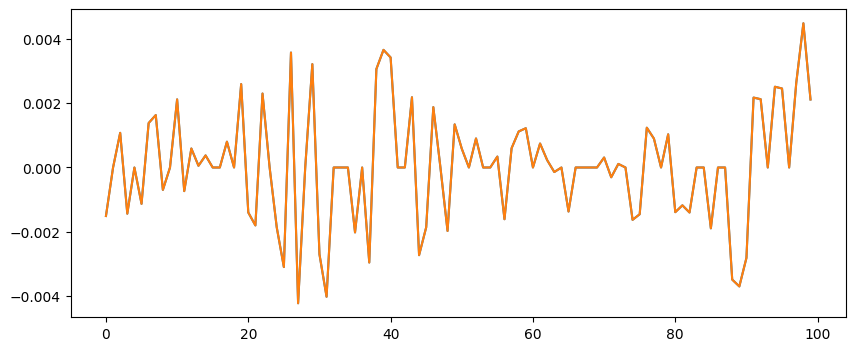

In [123]:
plt.figure(figsize=(10, 4))
plt.plot(rewards[:200])
plt.plot(agent._exp_buffer._total_discounted_rewards[:200])

In [124]:
episode = 0

while True:
    agent.train(ppo_epoch=4, batch_size=16)

episode : 0, done reward : -1.1457476530194164, total_step : 8731, cur_epsilon : 0.5912689999999999
episode : 1, done reward : 0.1378554945835535, total_step : 17562, cur_epsilon : 0.582438
episode : 2, done reward : -0.16462566947339663, total_step : 26393, cur_epsilon : 0.573607
episode : 3, done reward : 0.13218147009739012, total_step : 35224, cur_epsilon : 0.564776
episode : 4, done reward : -0.1518158017328215, total_step : 44055, cur_epsilon : 0.555945
episode : 5, done reward : -0.14430024804374197, total_step : 52886, cur_epsilon : 0.547114
episode : 6, done reward : -0.9121207660429852, total_step : 61717, cur_epsilon : 0.538283
episode : 7, done reward : -0.49590015466768766, total_step : 70548, cur_epsilon : 0.529452
episode : 8, done reward : -0.4903702346684673, total_step : 79379, cur_epsilon : 0.520621
episode : 9, done reward : -0.3528543693198285, total_step : 88210, cur_epsilon : 0.51179
episode : 10, done reward : -0.16284277933775881, total_step : 97041, cur_epsilo

KeyboardInterrupt: ignored

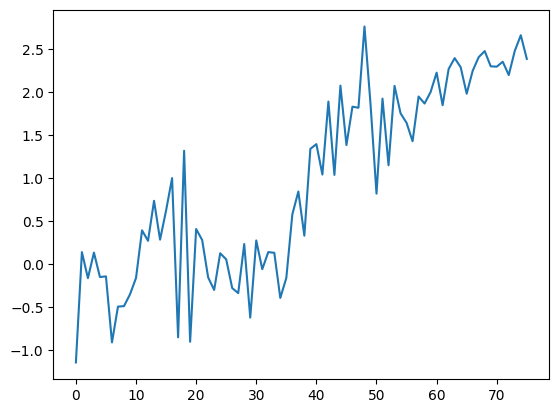

In [125]:
plt.plot(agent._episode_rewards)

<Axes: >

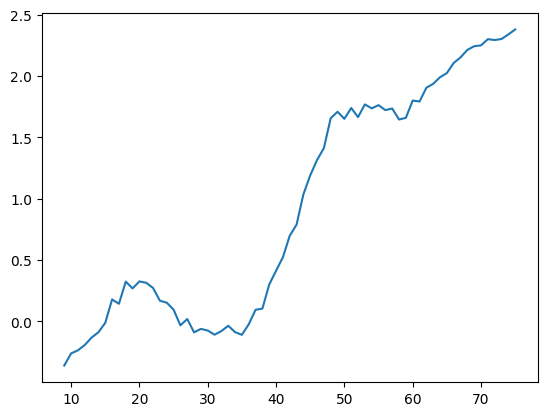

In [127]:
pd.Series(agent._episode_rewards).rolling(window=10).mean().plot()

In [128]:
df_target_train[TARGET].abs().sum()

38.92619803687434

### exp2

In [299]:
df_rewards_ts_test = pd.DataFrame(
    data={
        'do_nothing': np.zeros(len(df_target_test)),
        'buy': df_target_test[TARGET],
        'sell': -df_target_test[TARGET]
    },
    index=df_feat_test.index
)


def on_episode_end(env, done_reward):
    agent._act_net.eval()
    rewards = []
    actions = {0: 0, 1: 0, 2: 0}
    for idx, row in df_feat_test.iterrows():
        state = row.to_numpy()
        state_v = torch.FloatTensor(state).unsqueeze(0).to(agent._device)
        prob_v = agent._act_net(state_v)
        action = int(prob_v.squeeze(dim=0).argmax().data.cpu())
        reward = df_rewards_ts_test.loc[idx].iloc[action]
        rewards.append(reward)
        actions[action] += 1
    total_reward = sum(rewards)
    agent._episode_test_rewards.append(rewards)
    print(f'episode {agent._episode} : test reward = {total_reward}, n_actions = {actions}')
    agent._act_net.train()

In [300]:
env = MarketEnv(
    action_space=ActionSpace(actions=ACTIONS),
    df_states_ts=df_feat_train,
    df_rewards_ts=pd.DataFrame(
        data={
            'do_nothing': np.zeros(len(df_target_train)),
            'buy': df_target_train[TARGET],
            'sell': -df_target_train[TARGET]
        },
        index=df_feat_train.index
    ),
    state_seq_len=1,
    on_episode_end=on_episode_end,
)

In [301]:
state = env.reset()

In [302]:
state

array([-0.64913101,  4.66520761, -1.78128747, -0.41859769,  0.38898419,
       -0.34746419,  0.01345803, -0.97601579, -0.25564612, -0.12485973,
        0.01470807,  0.02389601,  0.46133077, -0.16534317,  0.1789744 ,
       -0.38117522,  5.33985625, -0.1950771 , -0.29744455, -0.21369627,
       -0.1448981 ,  1.83219906,  3.58290331,  1.87354496,  2.79359074,
        0.86336234, -0.08671296,  0.6010582 ,  0.25751402,  0.17977558,
        0.54110704, -1.24307943,  2.56156861, -0.27679384])

In [303]:
device = 'cpu'

In [304]:
OBS_DIM = len(state)

In [305]:
OBS_DIM

34

In [306]:
len(FEAT_COLS)

34

In [307]:
act_net = ModelActor(OBS_DIM, N_ACTIONS).to(device)
crt_net = ModelCritic(OBS_DIM).to(device)

In [308]:
exp_buffer = ExpBuffer(
    # max_size=20000,
    max_size=2500,
    prob_alpha=0.6,
    beta_start=0.4,
    beta_frames=30000, #100000,
    n_step=1,
    gamma=0.99,
)

In [309]:
agent = Agent(
    env=env,
    exp_buffer=exp_buffer,
    crt_net=crt_net,
    act_net=act_net,
    epsilon_start=0.6,
    epsilon_final=0.002,
    epsilon_decay_last_step=1000000, #200000,
    # tgt_sync_steps=1000,
    act_learning_rate=1e-5,
    crt_learning_rate=1e-4,
    device=device,
    trajectory_size=2049,
    ppo_eps=0.2,
    gae_lambda=0.95,
)

In [310]:
agent.initial_exploration(n_steps=100)

In [311]:
states, actions, rewards, dones, next_states = zip(*agent._exp_buffer._buf)

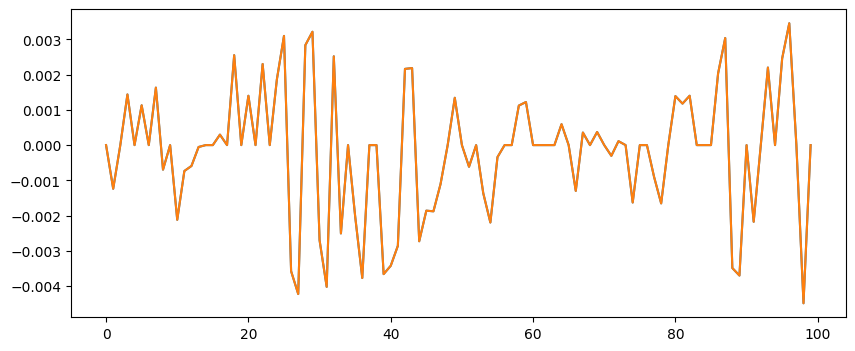

In [312]:
plt.figure(figsize=(10, 4))
plt.plot(rewards[:200])
plt.plot(agent._exp_buffer._total_discounted_rewards[:200])

In [313]:
episode = 0

while True:
    agent.train(ppo_epoch=4, batch_size=16)

ストリーミング出力は最後の 5000 行に切り捨てられました。
episode 2197 : test reward = -3.3350591867061756, n_actions = {0: 0, 1: 794, 2: 2182}
episode : 2197, done reward : 8.433321511457187, total_step : 19410438, cur_epsilon : 0.002
episode 2198 : test reward = -3.364881859831782, n_actions = {0: 0, 1: 793, 2: 2183}
episode : 2198, done reward : 8.384990485470652, total_step : 19419269, cur_epsilon : 0.002
episode 2199 : test reward = -3.413370659993921, n_actions = {0: 0, 1: 782, 2: 2194}
episode : 2199, done reward : 8.360376805699932, total_step : 19428100, cur_epsilon : 0.002
episode 2200 : test reward = -3.4622516692459233, n_actions = {0: 0, 1: 789, 2: 2187}
episode : 2200, done reward : 8.290164069503124, total_step : 19436931, cur_epsilon : 0.002
episode 2201 : test reward = -3.4455714732110674, n_actions = {0: 0, 1: 779, 2: 2197}
episode : 2201, done reward : 8.27547805039585, total_step : 19445762, cur_epsilon : 0.002
episode 2202 : test reward = -3.3877873908337715, n_actions = {0: 0, 1: 791, 2: 2

ValueError: ignored